In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
dataset = pd.read_csv("Datasets/petrol_consumption.csv") 

In [4]:
dataset.shape

(48, 5)

In [5]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [6]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [7]:
''' Divide Data into attributes and labels.
X is our attribute set and y contains the class'''
X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption'] 

'''The model_selection library of Scikit-Learn contains train_test_split method, 
which we'll use to randomly split the data into training and testing sets'''
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

In [8]:
'''The tree library contains built-in classes/methods for various decision tree algorithms 
(DecisionTreeRegressor, DecisionTreeClassifier). The fit method of this class is called to train the algorithm on the 
training data, which is passed as parameter to the fit method.'''
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [9]:
'Make predictions using the predict method'
y_pred = regressor.predict(X_test)  

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df

,Actual,Predicted
29,534,547.0
4,410,414.0
26,577,574.0
30,571,554.0
32,577,574.0
37,704,574.0
34,487,648.0
40,587,649.0
7,467,414.0
10,580,510.0


In [10]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

'''The mean absolute error for our algorithm is 54.7, which is less than 10 percent of the mean of all the values 
in the 'Petrol_Consumption' column. This means that our algorithm did a fine prediction job.'''

('Mean Absolute Error:', 51.6)
('Mean Squared Error:', 5486.6)
('Root Mean Squared Error:', 74.0715869952845)


"The mean absolute error for our algorithm is 54.7, which is less than 10 percent of the mean of all the values \nin the 'Petrol_Consumption' column. This means that our algorithm did a fine prediction job."

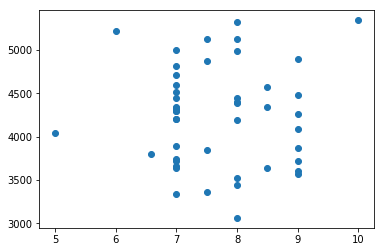

In [12]:
# Scatterplot Matrix
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix

# scatter_matrix(dataset)
# plt.show()

plt.scatter(dataset.Petrol_tax, dataset.Average_income, marker='o');